# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import json
from pprint import pprint



### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [60]:
#
path_stats_file = "data_resources/combined_playerStats_weatherData.csv"
combined_playerStats_weatherData_pd = pd.read_csv(path_stats_file)
combined_playerStats_weatherData_pd.head()


,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,...,0,0,0,83.012821,2015,Regular,Grass,66.2,mostly cloudy,9.2
1,1,3603,2015,1,Hyde,C,RB,28,Vikings,49ers,...,2,14,0,NaN,2015,Regular,Grass,66.2,mostly cloudy,9.2
2,2,3603,2015,1,Bush,R,RB,25,Vikings,49ers,...,0,0,0,NaN,2015,Regular,Grass,66.2,mostly cloudy,9.2
3,3,3603,2015,1,Hayne,Jarryd,RB,0,Vikings,49ers,...,1,7,0,NaN,2015,Regular,Grass,66.2,mostly cloudy,9.2
4,4,3603,2015,1,Celek,G,TE,81,Vikings,49ers,...,3,40,0,NaN,2015,Regular,Grass,66.2,mostly cloudy,9.2


In [61]:
combined_playerStats_weatherData_pd.query('lastName=="Garoppolo" and gameId == 4936')

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
26949,26949,4936,2020,1,Garoppolo,J,QB,10,Cardinals,49ers,...,0,0,0,102.967172,2020,Regular,Grass,66.0,haze,6.0


In [83]:
#File name = QB Stats and Weather Data.csv
path_weather_QB_file = "data_resources/QB Stats and Weather Data.csv"
weather_QB_pd = pd.read_csv(path_weather_QB_file)
weather_QB_pd.head()

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,...,0,0,0,83.012821,2015,Regular,Grass,66.2,mostly cloudy,9.2
1,11,3590,2015,1,Cutler,J,QB,6,Packers,Bears,...,0,0,0,67.476852,2015,Regular,Grass,69.1,mostly cloudy,8.1
2,22,3599,2015,1,Dalton,A,QB,14,Raiders,Bengals,...,0,0,0,115.931373,2015,Regular,Grass,64.0,scattered clouds,15.0
3,32,3589,2015,1,Taylor,T,QB,2,Colts,Bills,...,0,0,0,123.793860,2015,Regular,Turf,53.1,light rain,13.8
4,42,3598,2015,1,Manning,P,QB,18,Ravens,Broncos,...,0,0,0,59.895833,2015,Regular,Grass,82.9,mostly cloudy,11.5


In [89]:
weather_QB_pd.value_counts()

Unnamed: 0  gameId  season_x  week  lastName    firstName  position  uniformNumber  opponent  team        att  comp  passYds  passTds  ints  sacks  sackYds  rush  rushYds  rushTds  rec  recYds  recTds  QB Rating   season_y  type     surface  temperature  conditions        windSpeed
32436       5463    2020      17    Smith       A          QB        11             Eagles    Washington  32   22    162      2        2     3      17       1      0       0        0    0       0       75.260417   2020      Regular  Grass    38.0         light rain        10.29        1
9897        4071    2016      15    Smith       A          QB        11             Titans    Chiefs      28   15    163      0        1     1      4        4      11      1        0    0       0       56.101190   2016      Regular  Grass    10.0         clear sky         4.60         1
10567       4108    2016      17    Rivers      P          QB        17             Chiefs    Chargers    38   22    269      2        2     

#
Data Clean up from weather_QB_pd

In [85]:
weather_QB_pd.dropna(inplace=True)
weather_QB_pd.count()

Unnamed: 0       2313
gameId           2313
season_x         2313
week             2313
lastName         2313
firstName        2313
position         2313
uniformNumber    2313
opponent         2313
team             2313
att              2313
comp             2313
passYds          2313
passTds          2313
ints             2313
sacks            2313
sackYds          2313
rush             2313
rushYds          2313
rushTds          2313
rec              2313
recYds           2313
recTds           2313
QB Rating        2313
season_y         2313
type             2313
surface          2313
temperature      2313
conditions       2313
windSpeed        2313
dtype: int64

In [11]:
QB_rating_condition = weather_QB_pd[["QB Rating", "conditions"]]
QB_rating_condition
#Remove Nan from dataSet
QB_rating_condition["conditions"].value_counts()

clear sky               786
overcast                392
mostly cloudy           227
partly cloudy           219
scattered clouds        138
overcast clouds         120
broken clouds            95
light rain               83
few clouds               61
rain                     57
moderate rain            33
cloudy                   33
haze                     22
light snow               16
snow                      8
mist                      6
heavy intensity rain      4
chance rain               4
thunderstorm              2
shower rain               2
very heavy rain           2
cold                      2
heavy rain                2
breeze                    2
fog                       2
Name: conditions, dtype: int64

In [12]:
QB_rating_condition_narrow = QB_rating_condition.query('conditions == "clear sky" or conditions == "overcast clouds" or conditions == "light snow" ')
QB_rating_condition_narrow

,QB Rating,conditions
5,75.347222,clear sky
7,107.638889,clear sky
11,95.659722,clear sky
12,83.472222,clear sky
27,86.898148,clear sky
...,...,...
2306,97.253788,overcast clouds
2307,76.348039,overcast clouds
2311,127.361111,overcast clouds
2313,106.944444,overcast clouds


In [13]:
x_axis_pd = QB_rating_condition_narrow["conditions"]
x_axis_pd 

5             clear sky
7             clear sky
11            clear sky
12            clear sky
27            clear sky
             ...       
2306    overcast clouds
2307    overcast clouds
2311    overcast clouds
2313    overcast clouds
2316    overcast clouds
Name: conditions, Length: 922, dtype: object

<BarContainer object of 301 artists>

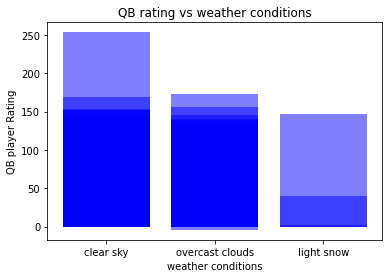

In [22]:
plt.title("QB rating vs weather conditions")
plt.xlabel("weather conditions")
plt.ylabel("QB player Rating")
plt.bar(QB_rating_condition_narrow["conditions"], QB_rating_condition_narrow["QB Rating"], color='b', alpha=0.5, align="center")

<BarContainer object of 2318 artists>

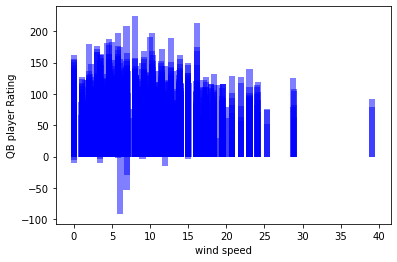

In [14]:
x_axis_wind_speed = weather_QB_pd["windSpeed"]
x_axis_wind_speed
y_axis_wind_speed = weather_QB_pd["QB Rating"]
plt.xlabel("wind speed")
plt.ylabel("QB player Rating")
plt.bar(x_axis_wind_speed, y_axis_wind_speed , color='b', alpha=0.5, align="center")

In [15]:
QB_rating_temperature = weather_QB_pd[["QB Rating", "temperature"]]

#Remove Nan from dataSet
QB_rating_temperature["temperature"].value_counts()

63.0    60
61.0    57
70.0    53
81.0    52
54.0    51
        ..
89.1     2
12.2     2
39.2     2
73.4     2
22.0     2
Name: temperature, Length: 133, dtype: int64

In [20]:
QB_rating_temperature["QB Rating"].max()

223.75000000000003

In [22]:
QB_rating_temperature["QB Rating"].min()

-91.36904761904762

In [64]:
QB_rating_temperature.dropna(inplace=True)

<ipython-input-64-db70d1667053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QB_rating_temperature.dropna(inplace=True)


In [16]:
QB_rating_temperature


,QB Rating,temperature
0,83.012821,66.2
1,67.476852,69.1
2,115.931373,64.0
3,123.793860,53.1
4,59.895833,82.9
...,...,...
2313,106.944444,39.0
2314,116.796875,57.0
2315,87.847222,57.0
2316,89.155983,39.0


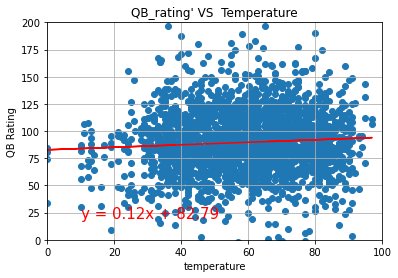

The r-squared value is: 0.004508151481051889
The p value value is: 0.0012184035363813177


In [18]:
x_values= QB_rating_temperature["temperature"]
y_values= QB_rating_temperature["QB Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("QB_rating' VS  Temperature")
plt.xlabel('temperature')
plt.ylabel('QB Rating')
plt.xlim(0,100)
plt.ylim(0,200)
plt.grid(True)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
print(f"The p value value is: {pvalue}")


In [ ]:
When looking at the relationship between QB Rating vs. Temp, there is very little correlation. 
An R-squared value of .0871 means that based on the data we have, if we were to make a prediction of Eli's QB Rating based on the temperature, we would only be accurate about 8.8 times out of 100. This translates into little or no statistical relevance.


In [17]:
 QB_rating_temperature["QB Rating"]

0        83.012821
1        67.476852
2       115.931373
3       123.793860
4        59.895833
           ...    
2313    106.944444
2314    116.796875
2315     87.847222
2316     89.155983
2317     75.260417
Name: QB Rating, Length: 2318, dtype: float64

,QB Rating,temperature
0,102.967172,66.0
1,104.166667,71.0
2,66.087963,83.0
3,104.619565,67.0
4,95.012626,74.0
...,...,...
633,115.865385,64.0
634,168.750000,64.0
635,103.317901,64.0
636,127.604167,35.0


In [28]:
#Rain
QB_rating_rain_df1 = weather_QB_pd.query('(conditions == "rain rain " or conditions == "heavy intensity rain") and lastName == "Jackson" ')

QB_rating_rain_df1

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
64,64,5240,2020,2,Jackson,Lamar,QB,8,Texans,Ravens,...,0,0,0,113.888889,2020.0,Regular,Turf-Roof,71.0,heavy intensity rain,17.22


In [32]:
QB_rating_rain_df2 = weather_QB_pd.query('conditions == "heavy intensity rain"')

QB_rating_rain_df2

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
64,64,5240,2020,2,Jackson,Lamar,QB,8,Texans,Ravens,...,0,0,0,113.888889,2020.0,Regular,Turf-Roof,71.0,heavy intensity rain,17.22
69,69,5240,2020,2,Watson,Deshaun,QB,4,Ravens,Texans,...,0,0,0,89.467593,2020.0,Regular,Turf-Roof,71.0,heavy intensity rain,17.22


In [90]:
weather_QB_pd[["QB Rating"]].describe

<bound method NDFrame.describe of        QB Rating
0      83.012821
1      67.476852
2     115.931373
3     123.793860
4      59.895833
...          ...
2313  106.944444
2314  116.796875
2315   87.847222
2316   89.155983
2317   75.260417

[2313 rows x 1 columns]>

In [91]:
#weather data weather_QB_pd
weather_QB_pd[["windSpeed","temperature","conditions"]]

,windSpeed,temperature,conditions
0,9.20,66.2,mostly cloudy
1,8.10,69.1,mostly cloudy
2,15.00,64.0,scattered clouds
3,13.80,53.1,light rain
4,11.50,82.9,mostly cloudy
...,...,...,...
2313,14.99,39.0,overcast clouds
2314,6.93,57.0,broken clouds
2315,4.70,57.0,broken clouds
2316,6.93,39.0,overcast clouds


In [10]:
y2 = weather_city_df.query('City=="Cape Town" and Temperature>65')
y2

,City,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed,Country,Date,Temperature
0,Cape Town,-33.9258,18.4232,68.34,61,0,1.99,ZA,1627916523,65.3


In [ ]:
y2 = weather_city_df.query('City=="Cape Town" and Temperature>65')

In [31]:
weather_QB_pd.columns

Index(['Unnamed: 0', 'gameId', 'season_x', 'week', 'lastName', 'firstName',
       'position', 'uniformNumber', 'opponent', 'team', 'att', 'comp',
       'passYds', 'passTds', 'ints', 'sacks', 'sackYds', 'rush', 'rushYds',
       'rushTds', 'rec', 'recYds', 'recTds', 'QB Rating', 'season_y', 'type',
       'surface', 'temperature', 'conditions', 'windSpeed'],
      dtype='object')

In [ ]:
# Including the season --- New work .... Start here

#
New work start from here

In [67]:
QB_R_season_weather =weather_QB_pd[["QB Rating","season_y","temperature" , "conditions","windSpeed"]]
QB_R_season_weather

,QB Rating,season_y,temperature,conditions,windSpeed
0,83.012821,2015,66.2,mostly cloudy,9.20
1,67.476852,2015,69.1,mostly cloudy,8.10
2,115.931373,2015,64.0,scattered clouds,15.00
3,123.793860,2015,53.1,light rain,13.80
4,59.895833,2015,82.9,mostly cloudy,11.50
...,...,...,...,...,...
2313,106.944444,2020,39.0,overcast clouds,14.99
2314,116.796875,2020,57.0,broken clouds,6.93
2315,87.847222,2020,57.0,broken clouds,4.70
2316,89.155983,2020,39.0,overcast clouds,6.93


In [94]:
# Data is clean there is no NAN
QB_R_season_weather["QB Rating"].describe

<bound method NDFrame.describe of 0        83.012821
1        67.476852
2       115.931373
3       123.793860
4        59.895833
           ...    
2313    106.944444
2314    116.796875
2315     87.847222
2316     89.155983
2317     75.260417
Name: QB Rating, Length: 2318, dtype: float64>

In [68]:
three_rating = pd.DataFrame()
QB_R_season_weather_2020 = QB_R_season.query('season_y=="2020"')
#r = QB_R_season_2020["QB Rating"].max()
#three_rating["MAX"] = 2.4
#hree_rating["Min"] = 2
#three_rating
QB_R_season_weather_2020

,QB Rating,season_y,temperature,conditions,windSpeed
1967,102.967172,2020,66.0,haze,6.00
1968,66.087963,2020,83.0,partly cloudy,6.00
1969,104.619565,2020,67.0,cloudy,15.00
1970,95.012626,2020,74.0,clear sky,1.01
1971,65.010684,2020,76.0,cloudy,5.00
...,...,...,...,...,...
2313,106.944444,2020,39.0,overcast clouds,14.99
2314,116.796875,2020,57.0,broken clouds,6.93
2315,87.847222,2020,57.0,broken clouds,4.70
2316,89.155983,2020,39.0,overcast clouds,6.93


In [72]:
# Narrow the condition:
QB_R_season_weather_2020_con_3 = QB_R_season_weather_2020.query('conditions == "clear sky" or conditions == "overcast clouds" or conditions == "light snow" ')
QB_R_season_weather_2020_con_3

,QB Rating,season_y,temperature,conditions,windSpeed
1970,95.012626,2020,74.0,clear sky,1.01
1980,98.897059,2020,81.0,clear sky,5.00
1982,107.500000,2020,81.0,clear sky,5.00
1984,117.838542,2020,65.0,clear sky,15.14
1986,97.916667,2020,74.0,clear sky,1.01
...,...,...,...,...,...
2306,97.253788,2020,65.0,overcast clouds,5.82
2307,76.348039,2020,35.0,overcast clouds,3.36
2311,127.361111,2020,35.0,overcast clouds,3.36
2313,106.944444,2020,39.0,overcast clouds,14.99


# Draw a  graph QB rating for season = 2020 against three weather condition

<BarContainer object of 167 artists>

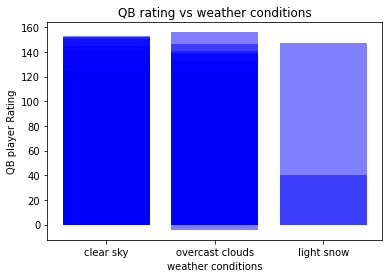

In [73]:
plt.title("QB rating vs weather conditions")
plt.xlabel("weather conditions")
plt.ylabel("QB player Rating")
plt.bar(QB_R_season_weather_2020_con_3["conditions"], QB_R_season_weather_2020_con_3["QB Rating"], color='b', alpha=0.5, align="center")

# graph # 2
#Draw a  graph QB rating for season = 2020 against temperature

<BarContainer object of 351 artists>

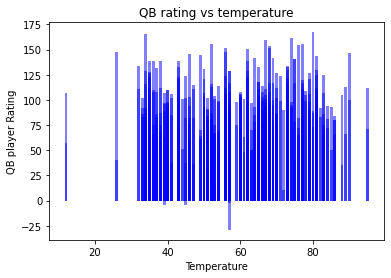

In [75]:
plt.title("QB rating vs temperature")
plt.xlabel("Temperature")
plt.ylabel("QB player Rating")
plt.bar(QB_R_season_weather_2020["temperature"], QB_R_season_weather_2020["QB Rating"], color='b', alpha=0.5, align="center")

#  Bar Graph 3
## ##Draw a  graph QB rating for season = 2020 against windspeed 

<BarContainer object of 351 artists>

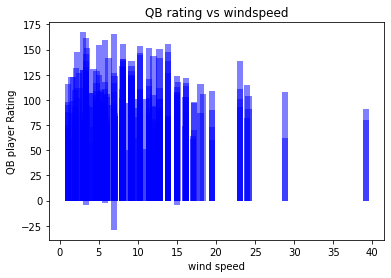

In [78]:
plt.title("QB rating vs windspeed")
plt.xlabel("wind speed")
plt.ylabel("QB player Rating")
plt.bar(QB_R_season_weather_2020["windSpeed"], QB_R_season_weather_2020["QB Rating"], color='b', alpha=0.5, align="center")

#  Scatter  Graph 4
# QB Rating against temperature where seaon = 2020
# r value
# P value
# line eq

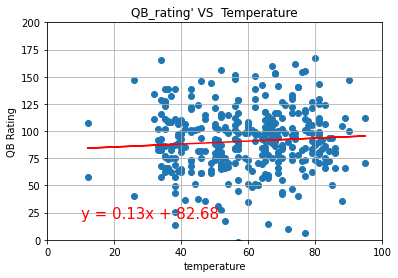

The r-squared value is: 0.005162712111913021
The p value value is: 0.179245505125972


In [77]:
x_values= QB_R_season_weather_2020["temperature"]
y_values= QB_R_season_weather_2020["QB Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("QB_rating' VS  Temperature")
plt.xlabel('temperature')
plt.ylabel('QB Rating')
plt.xlim(0,100)
plt.ylim(0,200)
plt.grid(True)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
print(f"The p value value is: {pvalue}")



# Graph 5 - QB Rating against windspeed where seaon = 2020
# r value
# P value
# line eq

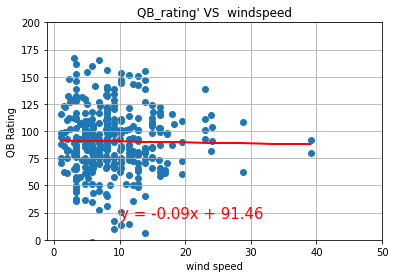

The r-squared value is: 0.000287058985600271
The p value value is: 0.7517642125227776


In [82]:
x_values= QB_R_season_weather_2020["windSpeed"]
y_values= QB_R_season_weather_2020["QB Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("QB_rating' VS  windspeed")
plt.xlabel('wind speed')
plt.ylabel('QB Rating')
plt.xlim(-1,50)
plt.ylim(0,200)
plt.grid(True)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
print(f"The p value value is: {pvalue}")


Figure(layout=FigureLayout(height='420px'))